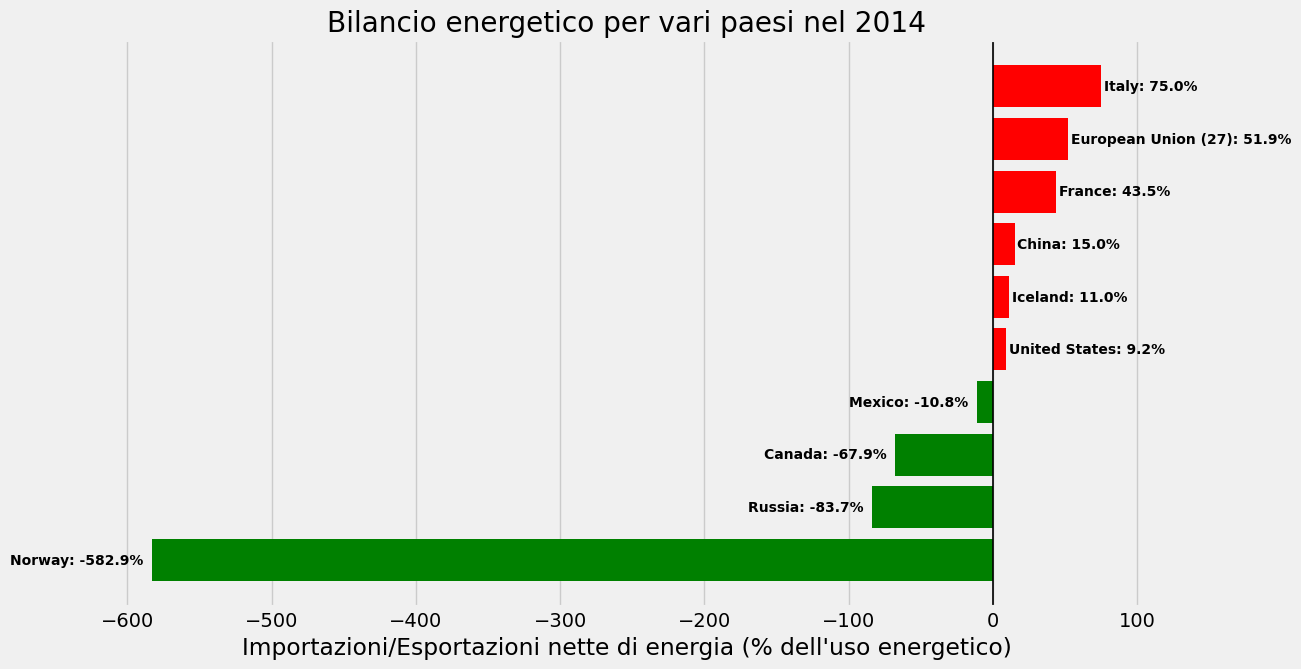

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Caricare i dati
dati = pd.read_csv('..\csv\prezzo\energy-imports-and-exports-energy-use.csv')
df = pd.DataFrame(dati)

# Selezione dell'anno
anno = 2014

# Filtro per l'anno e rimozione della voce "World"
df = df[(df["Year"] == anno) & (df["Entity"] != "World")]

# Selezione solo dei paesi di interesse
paesi_interesse = [
    "China", "Italy", "France","European Union (27)",
    "Mexico", "Canada", "Norway", "Russia", "United States","Iceland"
]
df = df[df["Entity"].isin(paesi_interesse)]

# Ordinare i dati per avere un grafico più chiaro
df = df.sort_values(by="Energy imports, net (% of energy use)")

# Impostare dimensione del grafico
fig, ax = plt.subplots(figsize=(12, 7))

# Creare il grafico a barre orizzontali
colors = ['green' if value < 0 else 'red' for value in df["Energy imports, net (% of energy use)"]]
bars = ax.barh(df["Entity"], df["Energy imports, net (% of energy use)"], color=colors)

# Aggiungere una linea verticale in corrispondenza dello zero
ax.axvline(x=0, color='black', linewidth=1.2)

# Rimuovere le etichette dall'asse Y
ax.set_yticklabels([])  # Questo toglie i nomi dei paesi dall'asse Y
ax.set_yticks([])        # Questo toglie anche i segni di riferimento sull'asse Y

# Aggiungere etichette sulle barre con nome del paese + valore
for bar, value, paese in zip(bars, df["Energy imports, net (% of energy use)"], df["Entity"]):
    x_position = bar.get_width() + (2 if value > 0 else -6)  # Sposta l'etichetta a destra/sinistra
    label = f"{paese}: {value:.1f}%"  # Etichetta con nome paese e valore
    ax.text(x_position, bar.get_y() + bar.get_height()/2, 
            label, va='center', ha='left' if value > 0 else 'right',
            fontsize=10, color='black', fontweight='bold')

# Etichette e titolo
ax.set_xlabel("Importazioni/Esportazioni nette di energia (% dell'uso energetico)")
ax.set_title("Bilancio energetico per vari paesi nel " + str(anno))

# Mostrare il grafico
plt.show()
